In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [69]:
breast_cancer_dataset= sklearn.datasets.load_breast_cancer()
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [70]:
df=pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
df['label']= breast_cancer_dataset.target

In [72]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
366,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.164100,0.126500,0.1875,0.06020,0.9761,1.8920,7.128,103.60,0.008439,0.046740,0.059040,0.025360,0.03710,0.004286,24.19,33.81,160.00,1671.0,0.1278,0.34160,0.37030,0.21520,0.3271,0.07632,0
389,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,0.6107,2.8360,5.383,70.10,0.011240,0.040970,0.074690,0.034410,0.02768,0.006240,20.82,30.44,142.00,1313.0,0.1251,0.24140,0.38290,0.18250,0.2576,0.07602,0
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.097990,0.077850,0.1618,0.05557,0.5781,0.9168,4.218,72.44,0.006208,0.019060,0.023750,0.014610,0.01445,0.001906,24.31,26.37,161.20,1780.0,0.1327,0.23760,0.27020,0.17650,0.2609,0.06735,0
309,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,0.3975,0.8285,2.567,33.01,0.004148,0.004711,0.002831,0.004821,0.01422,0.002273,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580,1
80,11.45,20.97,73.81,401.5,0.11020,0.09362,0.045910,0.022330,0.1842,0.07005,0.3251,2.1740,2.077,24.62,0.010370,0.017060,0.025860,0.007506,0.01816,0.003976,13.11,32.16,84.53,525.1,0.1557,0.16760,0.17550,0.06127,0.2762,0.08851,1


In [73]:
df.shape

(569, 31)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [75]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [76]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [77]:
df.label.value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [78]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [79]:
x=df.drop('label',axis=1)
y=df.label

In [80]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [82]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [84]:
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [85]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [86]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid'),
    
])

c:\Users\ashnk\anaconda3\envs\genai\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [88]:
history=model.fit(x_train_std,y_train,validation_split=0.1,epochs=15,verbose=1)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4311 - loss: 0.8388 - val_accuracy: 0.6957 - val_loss: 0.5603
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7729 - loss: 0.5548 - val_accuracy: 0.8696 - val_loss: 0.3876
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8880 - loss: 0.3981 - val_accuracy: 0.9130 - val_loss: 0.2926
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9150 - loss: 0.3054 - val_accuracy: 0.9348 - val_loss: 0.2350
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9205 - loss: 0.2454 - val_accuracy: 0.9565 - val_loss: 0.1977
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9466 - loss: 0.2044 - val_accuracy: 0.9565 - val_loss: 0.1724
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9559 - loss: 0.1775 - val_accuracy: 0.9565 - val_loss: 0.1549
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9623 - loss: 0.1586 - val_accuracy: 0.9565 - v

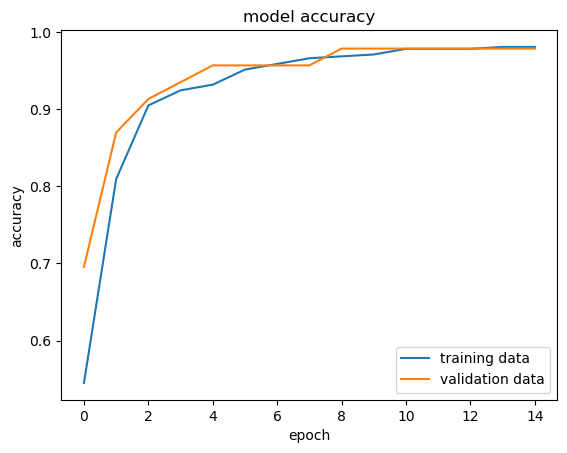

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

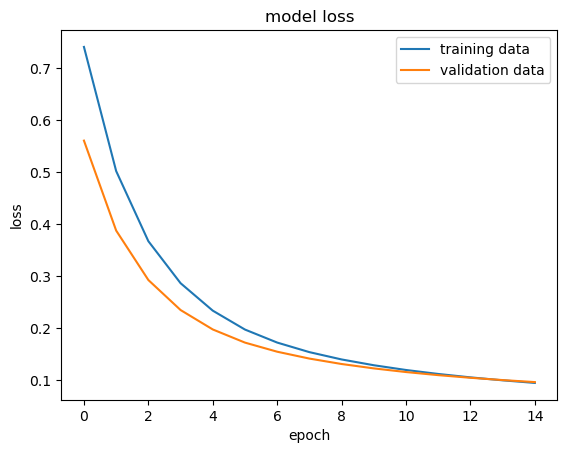

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')

In [91]:
loss , accuracy= model.evaluate(x_test_std,y_test)
accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9551 - loss: 0.1111


0.9736841917037964

In [92]:
y_pred= model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [93]:
y_pred

array([[3.25926661e-01, 6.83999956e-01],
       [8.18134189e-01, 3.07989269e-02],
       [7.18709171e-01, 1.01686157e-01],
       [9.65907797e-02, 7.63549328e-01],
       [9.52849016e-02, 9.09028709e-01],
       [9.83096480e-01, 1.10248402e-04],
       [9.32293534e-01, 1.80364714e-03],
       [5.67327976e-01, 3.14958364e-01],
       [4.64396000e-01, 3.68463963e-01],
       [2.24264830e-01, 9.42919135e-01],
       [2.80268282e-01, 8.28601122e-01],
       [6.49284482e-01, 2.12244272e-01],
       [2.33824953e-01, 9.19130206e-01],
       [2.73965925e-01, 3.17954063e-01],
       [2.29463145e-01, 9.63639438e-01],
       [5.87398350e-01, 5.46630733e-02],
       [2.91887581e-01, 9.43543255e-01],
       [9.56260934e-02, 9.46540833e-01],
       [2.21360438e-02, 9.72584009e-01],
       [8.95738959e-01, 7.21678464e-03],
       [3.27030241e-01, 7.25989103e-01],
       [3.01081032e-01, 8.51842284e-01],
       [9.63275790e-01, 8.35450366e-04],
       [8.06946382e-02, 9.71004963e-01],
       [1.703979

In [94]:
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0]

In [97]:
x_train.iloc[99]


mean radius                 10.660000
mean texture                15.150000
mean perimeter              67.490000
mean area                  349.600000
mean smoothness              0.087920
mean compactness             0.043020
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.192800
mean fractal dimension       0.059750
radius error                 0.330900
texture error                1.925000
perimeter error              2.155000
area error                  21.980000
smoothness error             0.008713
compactness error            0.010170
concavity error              0.000000
concave points error         0.000000
symmetry error               0.032650
fractal dimension error      0.001002
worst radius                11.540000
worst texture               19.200000
worst perimeter             73.200000
worst area                 408.300000
worst smoothness             0.107600
worst compactness            0.067910
worst concav

In [102]:
input_data=(20.20,	26.83,	133.70,	1234.0,	0.09905,	0.16690,	0.164100,	0.126500,	0.1875,	0.06020	,0.9761,	1.8920,	7.128,	103.60,	0.008439,	0.046740,	0.059040,	0.025360,	0.03710,	0.004286,	24.19,	33.81,	160.00,	1671.0,	0.1278,	0.34160,	0.37030,	0.21520,	0.3271,	0.07632)

input_data_as_numpy_array= np.asarray(input_data)

print(input_data_as_numpy_array.shape)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped.shape)

input_data_std= scaler.transform(input_data_reshaped)

prediction= model.predict(input_data_std)
print(prediction)

prediction_label= [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
    print('The tumor is Malignant')
else:
    print("The tumor is Beign")

(30,)
(1, 30)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


c:\Users\ashnk\anaconda3\envs\genai\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.77989733 0.00356312]]
[0]
The tumor is Malignant
